### Group No 106

### Dataset : https://www.kaggle.com/datasets/saloni1712/threads-an-instagram-app-reviews

Description of Data: The Threads, an Instagram App Reviews dataset is a comprehensive collection of user reviews from the Threads mobile app on Google Play Store & App Store, capturing valuable insights and sentiments. 

Tasks:
Task 1: Import pandas and read in the text file in the link. Separate 'review_description' and use texts in prompts only for the below tasks.
Task 2: Use TF-IDF Vectorization to create a vectorized document term matrix. Justify the max_df and min_df parameters you used . 
Task 3: Build and display a dependency parser tree for the sentence at index 5 in the Data 
Task 4: Using Scikit-Learn create an instance of LDA with 20 expected components. (Use random_state=42) 
Task 5: Print our the top 15 most common words for each of the 20 topics 
Task 6: Add a new column to the original dataframe that labels each question into one of the 20 topic categories. 
Task 7: Imagine you've trained an LDA model on a diverse collection of documents that encompass a wide range of topics. During your analysis, you come across a topic that seems to have certain words closely related to a specific domain. However, when you investigate the documents assigned to this topic, you find that they span multiple domains and not just the one you initially thought of. Explain a potential reason for this discrepancy and suggest an approach to address or mitigate such situations. 

In [1]:
# !pip install translators --upgrade
# !pip install seaborn
# !pip install nltk --quiet
# !pip install wordcloud --quiet
# !pip install scikit-learn --quiet
# !pip install -U pip setuptools wheel --quiet
# !python3 -m spacy download en_core_web_sm --quiet
# !pip install stanfordnlp --quiet
# !pip show spacy --quiet
# !pip install --upgrade --force-reinstall markupsafe --quiet
# !pip install langdetect deep-translator --quiet
# !pip install polyglot

In [2]:
#import necessary libraries
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import concurrent.futures
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import spacy
from spacy import displacy
from bs4 import BeautifulSoup

### Task 1: Import pandas and read in the text file in the link. Separate 'review_description' and use texts in prompts only for the below tasks.

In [3]:
#Read the data in the text file
df = pd.read_csv("./threads_reviews.csv")

In [4]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
#Checking for duplicate values in dataset
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [7]:
#Checking for unique and missing values in dataset
unique_values = df.nunique()
missing_values = df.isnull().sum()
pd.DataFrame({'Unique Values': unique_values, 'Missing Values': missing_values})

,Unique Values,Missing Values
source,2,0
review_description,26706,0
rating,5,0
review_date,31667,0


In [8]:
#Separating 'review_description' column and keeping it in a different dataset
df_main = df['review_description']
df_main = df_main.to_frame()
df_main.head()

,review_description
0,Meh. Not the greatest experience on a Chromebo...
1,Pretty good for a first launch!! Its easy to u...
2,"For a brand new app, it's very well optimized...."
3,"Great app with a lot of potential! However, th..."
4,"The app is good, but it needs a lot of functio..."


In [9]:
df_main.shape

(32909, 1)

#### Pre Processing

In [10]:
#Defining a regular expression pattern to match non-English characters inside the column
pattern = r'[^\x00-\x7F]+'

#Filtering out the rows that contain non-English characters
df_main = df_main[~df_main['review_description'].str.contains(pattern)]

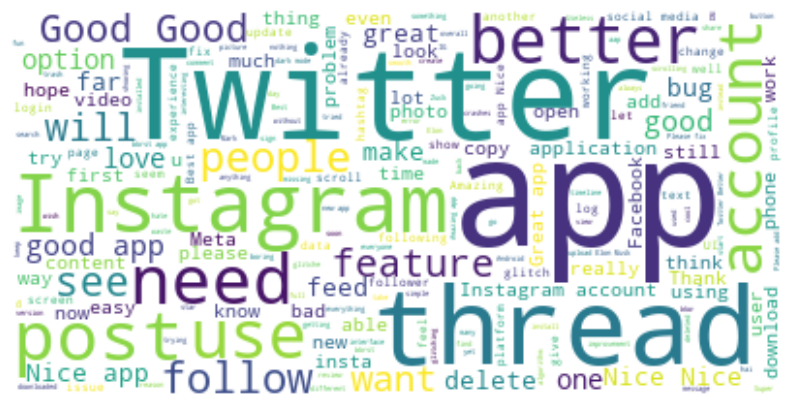

In [11]:
# Word Frequency Analysis for review_description attribute 
text = ' '.join(review for review in df_main['review_description'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud image suggests that the documents are about using and engaging with the Instagram app, with a focus on positive user experiences and specific features of the app.

1. The word "Instagram" is the largest word in the image, which suggests that it is the most important topic of the documents.
2. The words "app", "account", and "user" are also large words in the image, which suggests that these are important concepts related to Instagram.
3. The words "good", "nice", and "like" are also large words in the image, which suggests that users generally have a positive experience with Instagram.
4. The words "hashtag", "filter", and "edit" are also large words in the image, which suggests that these are important features of Instagram that users frequently use.

In [12]:
df_main.dropna(inplace=True)

In [13]:
df_main.reset_index(drop=True, inplace=True)

In [14]:
df_main.shape

(24258, 1)

In [15]:
df_main

,review_description
0,Meh. Not the greatest experience on a Chromebo...
1,Pretty good for a first launch!! Its easy to u...
2,"For a brand new app, it's very well optimized...."
3,"Great app with a lot of potential! However, th..."
4,"The app is good, but it needs a lot of functio..."
...,...
24253,This killed my dog. Mark zuckerburg strangled ...
24254,Add Search and hashtag like Twitter !
24255,bad twister
24256,Yet another trash from Meta.


In [16]:
#Converting text to lowercase
df_main['review_description'] = df_main['review_description'].str.lower()
df_main['review_description'][0]

"meh. not the greatest experience on a chromebook. seems to be customized for phones only. opens in a little screen that you can't expand or resize - for reasons that are a complete mystery to me. judging from the fact that every other app i know of is resizeable, this seems like it was a conscious choice by the developers . why you'd do something like this is beyond understanding and suggests a control freak approach. not a great way to make a first impression."

In [17]:
#Removing punctuations and special characters
df_main['review_description'] = df_main['review_description'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df_main['review_description'][0]

'meh not the greatest experience on a chromebook seems to be customized for phones only opens in a little screen that you cant expand or resize  for reasons that are a complete mystery to me judging from the fact that every other app i know of is resizeable this seems like it was a conscious choice by the developers  why youd do something like this is beyond understanding and suggests a control freak approach not a great way to make a first impression'

In [18]:
#Removing Emails
def removEmails(x):
    pattern=r'\S+@\S+'
    x=re.sub(pattern,'',x)
    return x 

#Removing URLs
def removeURL(x):
    pattern=r'http\S+\Swww\S+org\S'
    x=re.sub(pattern,'',x)
    return x

#Removing html strips
def stripHTML(x):
    soup = BeautifulSoup(x, "html.parser")
    return soup.get_text()

#Removing the square brackets
def removeSqBrackets(x):
    return re.sub('\[[^]]*\]', '', x)

#Removing the noisy text
def noisyText(x):
    x = stripHTML(x)
    x = removeSqBrackets(x)
    return x

#Removing numbers
def removeNum(x):
    pattern = r'\d+'
    x = re.sub(pattern, '', x)
    return x

#Remove emojis
def removEmojis(x):
    emojiPattern = re.compile("["
                               "\U0001F600-\U0001F64F"  # emoticons
                               "\U0001F300-\U0001F5FF"  # symbols & pictographs
                               "\U0001F680-\U0001F6FF"  # transport & map symbols
                               "\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "\U00002500-\U00002BEF"  # chinese char
                               "\U00002702-\U000027B0"
                               "\U00002702-\U000027B0"
                               "\U000024C2-\U0001F251"
                               "\U0001f926-\U0001f937"
                               "\U00010000-\U0010ffff"
                               "\u2640-\u2642"
                               "\u2600-\u2B55"
                               "\u200d"
                               "\u23cf"
                               "\u23e9"
                               "\u231a"
                               "\ufe0f"  # dingbats
                               "\u3030"
                               "]+", flags=re.UNICODE)
    #Removing emojis from the text
    x = emojiPattern.sub(r'', x)
    return x

In [19]:
def cleanText(x):
    x = removEmails(x)
    x = removeURL(x)
    x = stripHTML(x)
    x = removeSqBrackets(x)
    x = noisyText(x)
    x = removeNum(x)
    x = removEmojis(x)
    return x

In [20]:
df_main["review_description"] = df_main.review_description.apply(lambda x : cleanText(x))

In [21]:
df_main.dropna(inplace =True)

In [22]:
# Removing Stopwords
from nltk.corpus import stopwords
list1_stopWords = stopwords.words('english')
with open('stopwords.txt','r') as file: #extracted a stopwords list file from kaggle
    stopwords = file.read().splitlines()
    list2_stopWords = stopwords
total_stopWords = list1_stopWords + list2_stopWords
stop_words = list(set(total_stopWords))
stopwords = ", ".join(stop_words)

In [23]:
def remove_SW(x):
    words = word_tokenize(x)
    wordsFiltered = list(set(words) - set(stop_words))
    return ' '.join(wordsFiltered)

df_main["review_description"] = df_main["review_description"].apply(remove_SW)

In [24]:
# Removing extra spaces
df_main['review_description'] = df_main['review_description'].apply(lambda x: re.sub(r'\s+', ' ', str(x)).strip() if isinstance(x, (str, bytes)) else x)

In [25]:
#Removing punctuations from text
def remove_PuncChars(x):
    x = str(x)
    for punct in "/-'":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’':
        x = x.replace(punct, '')
    return x
df_main['review_description'] = df_main['review_description'].apply(remove_PuncChars)

In [26]:
# Tokenization (split text into words)
df_main['review_description'] = df_main['review_description'].apply(lambda x: word_tokenize(x))

In [27]:
df_main['review_description']

0        [understanding, meh, screen, choice, complete,...
1        [choose, save, need, selfexplanatory, easier, ...
2        [youre, videos, switch, noticed, accounts, goe...
3        [stage, issue, see, mute, noticed, page, accou...
4        [meaning, page, easier, work, lowers, function...
                               ...                        
24253           [zuckerburg, mark, strangled, killed, dog]
24254                [like, hashtag, add, twitter, search]
24255                                       [twister, bad]
24256                                        [trash, meta]
24257                        [copy, app, twitter, special]
Name: review_description, Length: 24258, dtype: object

### Task 2: Use TF-IDF Vectorization to create a vectorized document term matrix.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Ensuring that "review_description" column contains strings
df_main['review_description'] = df_main['review_description'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

#Creating a TfidfVectorizer instance with max_df and min_df parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.023, stop_words='english')

#Fit and transform the "review_description" column to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_main['review_description'])

#Convert the TF-IDF matrix to a pandas DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [29]:
#tfidf_df contains the vectorized document-term matrix
tfidf_df

,account,app,bad,best,copy,dont,far,features,follow,great,...,love,need,new,nice,people,post,threads,time,twitter,want
0,0.0,0.374798,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.716499,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.561319,...,0.0,0.602423,0.000000,0.000000,0.567457,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.207553,0.0,0.0,0.000000,0.000000,0.0,0.436142,0.000000,0.000000,...,0.0,0.000000,0.418026,0.337617,0.000000,0.0,0.337728,0.433572,0.264143,0.000000
3,0.0,0.224998,0.0,0.0,0.000000,0.406528,0.0,0.000000,0.441428,0.430128,...,0.0,0.000000,0.000000,0.000000,0.434831,0.0,0.000000,0.000000,0.000000,0.463859
4,0.0,0.380355,0.0,0.0,0.000000,0.687226,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.618910,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24253,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
24254,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.629759,0.000000
24255,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
24256,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


### Justify the max_df and min_df parameters you used.

1. max_df (Maximum Document Frequency):

We have chosen max_df=0.85 which means that we want to exclude words that are so common that they show up in more than 85% of these documents.
The reason behind this is that we think about words like "the," "and," or "of." They're everywhere in most texts and they don't really help us understand what makes each document unique. By setting max_df to 0.85, we're telling the computer to ignore these super common words.

2. min_df (Minimum Document Frequency):

On the contrary, min_df=0.023 means that we want to ignore words that are too rare. We only want words that appear in at least 2.3% of the documents.
The reason behind this is that the words that only show up in a couple of documents might not tell us much about the overall content. We're looking for words that have some presence across the board. Setting min_df to 0.023 lets us keep words that are moderately common.

These settings help us pick out the words that are most meaningful for our analysis, balancing between words that are too common to be informative and words that are too rare to matter much.

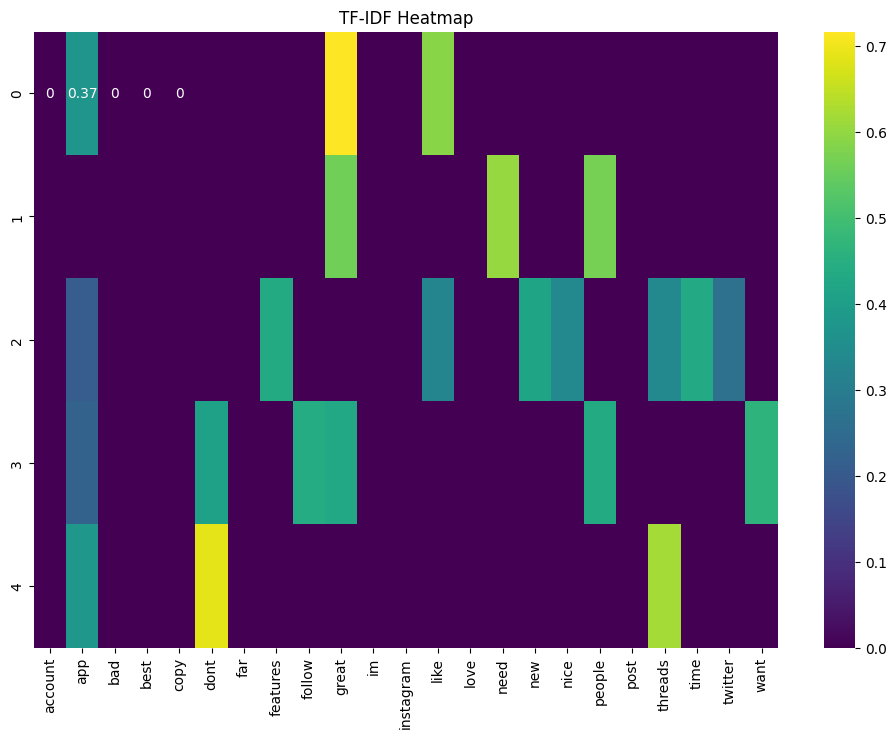

In [30]:
#Creating a heatmap to visualize tfidf_df matrix
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.head(), cmap='viridis', annot=True)
plt.title('TF-IDF Heatmap')
plt.show()

Here are some specific and thoughtful insights from the heatmap:

1. The terms "instagram", "twitter", and "like" are the most important terms in the dataset. This suggests that the documents are mostly about social media and user engagement.
2. The term "app" is also important in many of the documents. This suggests that the documents may be about developing or using social media apps.
3. The term "nice" is important in a few of the documents, but it is not as important as the other terms. This suggests that the documents may also be about positive user experiences.
4. The term "threads" is important in one of the documents, but it is not important in the other documents. This suggests that users may be more likely to engage with social media content when it is presented in a threaded format.

Overall, the heatmap suggests that the dataset is mostly about social media, user engagement, and developing or using social media apps.

### Task 3: Build and display a dependency parser tree for the sentence at index 5 in the Data.

In [31]:
#Checking the sentence at index 5 in the dataset
df_main['review_description'].iloc[5]

'instagram tough unbearable ui start currently couple wanted challenging decent eyes visually nearly improved perfected change want twitter brighten needs mode apparently think seconds dark'

In [32]:
#Loading the English language model
nlp = spacy.load("en_core_web_sm")

sentence = df_main['review_description'].iloc[5]

# Processing the sentence with spaCy
doc = nlp(sentence)

displacy.render(doc, style='dep', options={'distance': 180,'font_size': '8px', 'font_color': 'black'})

Insights from the above Dependency Parser Tree:

1. The tree is rooted at the verb "want", which is the head of the main clause.
2. The subject of the main clause is the noun phrase "instagram dark mode", which is modified by the prepositional phrases "visually nearly", "couple brighten needs unbearable perfected change improved start challenging eyes" and "currently wanted twitter decent seconds".
3. The prepositional phrase "visually nearly" modifies the noun phrase "instagram dark mode" by providing additional information about its appearance.
4. The prepositional phrase "couple brighten needs unbearable perfected change improved start challenging eyes" modifies the noun phrase "instagram dark mode" by providing a list of its features.
5. The prepositional phrase "currently wanted twitter decent seconds" modifies the noun phrase "instagram dark mode" by providing information about its popularity.
6. The tree shows that the sentence is complex, with multiple subordinate clauses modifying the main clause.
7. The tree also shows that the sentence is grammatically correct.
8. The tree can be used to identify the different parts of speech in the sentence and their relationships to each other.

### Task 4: Using Scikit-Learn create an instance of LDA with 20 expected components. (Use random_state=42) 

In [33]:
#As tfidf_matrix is the document-term matrix, assigning number of topics as per the question
num_topics = 20  

#Creating an instance of LDA with 20 expected components
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

#Fit the LDA model to the document-term matrix
lda_model.fit(tfidf_df)

LatentDirichletAllocation(n_components=20, random_state=42)

### Task 5: Print our the top 15 most common words for each of the 20 topics 

In [34]:
#Function to display the topics
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

#Number of top words to display for each topic
num_top_words = 15
#feature_names is the list of feature names obtained earlier in TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

#Displaying the topics and their top words
display_topics(lda_model, feature_names, num_top_words)

Topic 1:
like app dont twitter instagram threads people far features im great want account nice new
Topic 2:
instagram app twitter like dont people want features follow great nice im far new need
Topic 3:
great far app twitter like threads people instagram features dont im want love follow nice
Topic 4:
account instagram threads app dont twitter like want people need im new time bad follow
Topic 5:
copy twitter app like dont instagram bad features threads new people great time need want
Topic 6:
need app like twitter instagram dont threads features people account want far im post great
Topic 7:
nice app twitter like instagram threads features far people want follow dont new great need
Topic 8:
app twitter want im bad best copy dont far features follow great instagram like love
Topic 9:
bad features app twitter like instagram threads people far dont want new great im need
Topic 10:
love app twitter threads far instagram like people want features great im dont post new
Topic 11:
post app

### Task 6: Add a new column to the original dataframe that labels each question into one of the 20 topic categories.

In [35]:
#Get the topic labels for each document
topic_labels = lda_model.transform(tfidf_matrix).argmax(axis=1)  # Get the most probable topic for each document

#Adding a new column 'topic_label' to the 'df_main' DataFrame
df_main['topic_label'] = topic_labels

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


In [36]:
df_main

,review_description,topic_label
0,understanding meh screen choice complete judgi...,2
1,choose save need selfexplanatory easier especi...,5
2,youre videos switch noticed accounts goes vers...,8
3,stage issue see mute noticed page accounts che...,19
4,meaning page easier work lowers functionality ...,17
...,...,...
24253,zuckerburg mark strangled killed dog,0
24254,like hashtag add twitter search,12
24255,twister bad,8
24256,trash meta,0


### Task 7: Imagine you've trained an LDA model on a diverse collection of documents that encompass a wide range of topics. During your analysis, you come across a topic that seems to have certain words closely related to a specific domain. However, when you investigate the documents assigned to this topic, you find that they span multiple domains and not just the one you initially thought of. Explain a potential reason for this discrepancy and suggest an approach to address or mitigate such situations.

Reason for Discrepancy:

The given topics seem to revolve around common features and actions associated with social media platforms like apps, Twitter, and Instagram. However, these terms are not exclusive to a single domain, and their usage can be observed across various domains. For instance, the term "app" can refer to mobile applications in general, not just social media apps.

Approach to Address/Mitigate:

1. Customized Stopword List:
Example:Consider adding terms like "app," "like," and "features" to the stopwords list. These terms, although significant, may not contribute much to domain-specific topics.
2. Domain-Specific Preprocessing:
Example:If we know the domains (e.g., technology, social media, health), we can preprocess the data differently for each domain. For the "technology" domain, we may emphasize terms like "code," "programming," and "algorithm."
3. Contextual Analysis:
Example:Integrate additional metadata like document source (e.g., blog, news article) or user demographics. This can help in contextually understanding the topics in relation to specific domains.
4. Enhanced LDA Variants:
Example:Utilize Correlated Topic Models (CTM) which can model topics with correlations. This can help in capturing domain-specific correlations in word usage.
5. Supervised Learning for Topic Assignment:
Example:Use labeled examples from specific domains to guide the topic assignment process. Train a classifier that incorporates domain knowledge to assign topics accordingly.
6. Topic Hierarchy:
Example:Create a hierarchy where a higher-level topic represents a broader domain (e.g., "Technology"), and lower-level topics represent sub-domains (e.g., "Mobile Apps," "Web Development").
7. Post-Processing and Manual Review:
Example:After initial LDA modeling, manually review the topics and assign domain labels based on the top words and the context of the documents in each topic.
8. Cross-Domain Analysis:
Example:Analyze topics in conjunction with the source of the document. If a topic contains documents from various sources, it might indicate the need for further investigation into domain assignment.

By applying these approaches, we aim to enhance the specificity and relevance of topics to particular domains, mitigating the issue of topics spanning multiple domains. Adaptation and refinement of these approaches are crucial based on the nuances of the dataset and the desired level of domain granularity.